In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random Samples ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination, and how long they were delayed in minutes.

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(0, united.num_rows))
united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


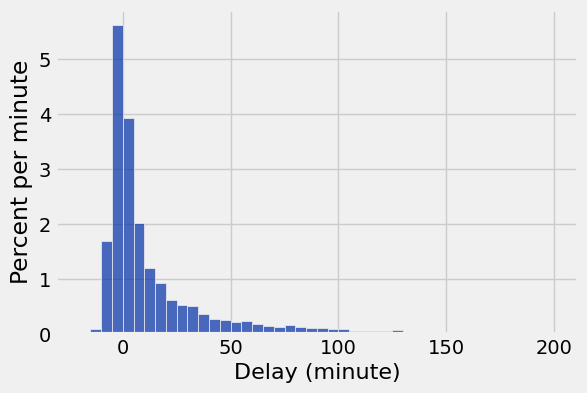

In [4]:
# Probability Distribution (assuming this is the entire population)
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins, unit = 'minute')

In [16]:
# Empirical Distribution of 10 flights
united_sample = united.sample(10)
united_sample

Date,Flight Number,Destination,Delay,Row
8/18/15,677,RNO,-3,11860
6/30/15,1192,LAX,1,4438
6/30/15,1216,IAH,9,4441
7/21/15,1563,ORD,4,7579
8/30/15,611,SEA,-5,13570
7/28/15,268,SNA,30,8555
6/21/15,1914,IAH,13,3126
8/10/15,1185,EWR,1,10644
6/1/15,500,MSP,28,25
8/13/15,1004,LAX,92,11113


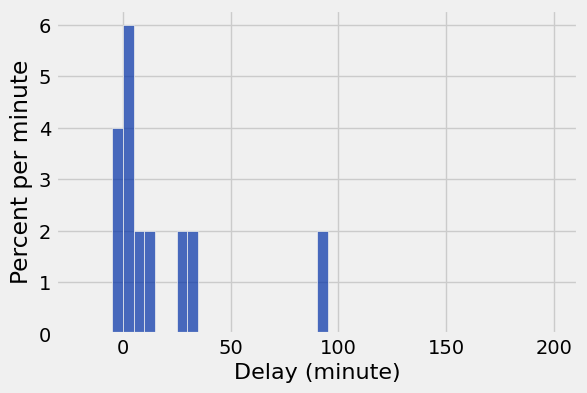

In [17]:
united_sample.hist('Delay', bins = united_bins, unit = 'minute')

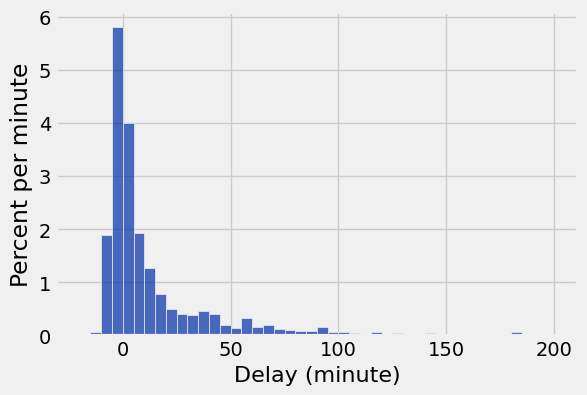

In [24]:
# Empirical Distribution of 1,000 flights
united_sample1000 = united.sample(1000)
united_sample1000.hist('Delay', bins = united_bins, unit = 'minute')

## Simulating Statistics ##

In [27]:
# (Population) Parameter
delays_arr = united.column('Delay')
np.median(delays_arr)

2.0

In [39]:
# (Sample) Statistic
united_sample = united.sample(10)
delays_sample_arr = united_sample.column('Delay')
np.median(delays_sample_arr)

3.0

## Empirical Distribution of a Statistic ##

In [40]:
# Write a function that takes a samples "size" rows from the table and returns the median
def sample_median(size):
    united_sample = united.sample(size)
    delays_sample_arr = united_sample.column('Delay')
    return np.median(delays_sample_arr)

In [57]:
# Call the function with a sample size = 10
sample_median(10)

1.0

In [63]:
# Call the function 1,000 times with a sample size = 10 & store the results in an array using append
sample_medians = make_array()

for i in np.arange(1000):
    simulated_median = sample_median(10)
    sample_medians = np.append(sample_medians, simulated_median)

sample_medians

array([  6.5,   2.5,  16.5,  -4. ,   2. ,   4. ,  -1.5,  24. ,   3.5,
         0. ,  12.5,   0.5,   4.5,  -3. ,  11.5,   1. ,   4.5,   2. ,
        -1.5,  -1. ,   9.5,   1. ,   8. ,   2.5,   4. ,  14. ,  15.5,
         6. ,  -3. ,   4.5,   1. ,  -1. ,   7.5,   5. ,  -2. ,  -0.5,
         1.5,  -1.5,   4. ,  11.5,   0.5,   4. ,   2.5,   3.5,  15.5,
        12.5,  -0.5,  -2. ,  13. ,   1. ,   2.5,   2. ,   2. ,   3.5,
         7. ,  10. ,   4. ,   7.5,  -1. ,   1.5,  -1.5,  -2. ,   6. ,
         8.5,   3.5,   0. ,  -2. ,   4.5,   3. ,  -1.5,   3.5,  15.5,
        -2. ,   9. ,   0. ,   7. ,  -2. ,   0. ,   7.5,   3. ,   1.5,
        -1. ,   0.5,   6.5,   1.5,   0.5,  10.5,   2. ,   9. ,   2.5,
         4.5,   0. ,  -3. ,  17. ,   1.5,   5.5,   5. ,  -3.5,  13. ,
         5. ,   0.5,   6. ,   3.5,   1.5,   7. ,   2.5,   1. ,   1. ,
         6.5,  -2. ,   0. ,   9.5,   7.5,   5. ,  -1. ,   2.5,  -1.5,
        -1.5,   7.5,   1. ,   4.5,   9.5,   4. ,   6. ,   2. ,   0.5,
         1.5,   6.5,

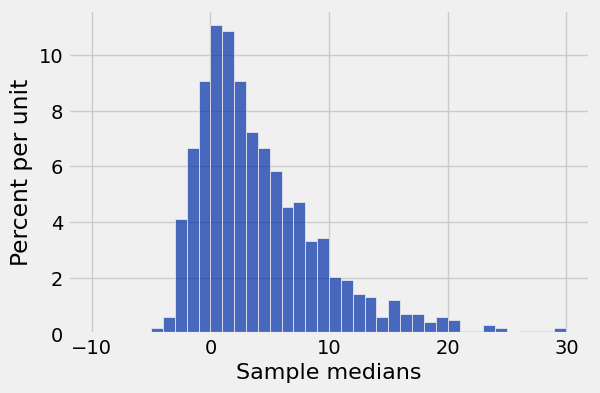

In [64]:
# Show the empirical distribution of sample size = 10
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

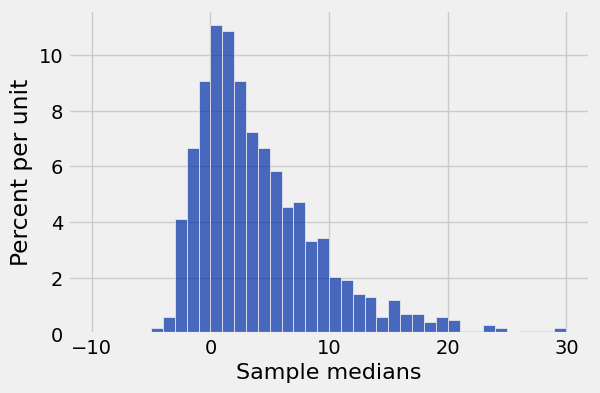

In [65]:
# Show the empirical distribution of sample size = 1,000
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Sampling from categorical distributions with `sample_proportions` ##

According to the CDC, about 10% of Americans 18 and over suffer from a depressive illness in any given year. [[source](https://www.cdc.gov/workplacehealthpromotion/health-strategies/depression/index.html)]

In [66]:
# Probability distribution
distribution_in_pop = make_array(0.9, 0.1)
distribution_in_pop

array([ 0.9,  0.1])

Suppose you have a group of 100 people. Let's simulate how many might suffer from a depressive illness, assuming we can treat each person as if they were drawn randomly from the population of US adults (a dubious assumption).

In [79]:
# Empirical distribution size 10
distribution_in_sample = sample_proportions(10, distribution_in_pop)
distribution_in_sample

array([ 0.8,  0.2])

In [80]:
# Empirical distribution size 1000
distribution_in_sample = sample_proportions(1000, distribution_in_pop)
distribution_in_sample

array([ 0.894,  0.106])

# Practice

A box contains 3 white balls, 4 black balls, and 1 green ball. You reach in and draw a ball three separate times, replacing the ball you drew before each draw (so the sample_proportions are the same for each draw). Call this procedure of drawing three balls one experiment.

Write a function that simulates this experiment and returns the statistic "number of green balls drawn".

In [90]:
def num_green():
    
    # prob_dist is probabily of green ball, probability of not green ball
    prob_dist = make_array(1/8, 7/8)
    sample_dist = sample_proportions(3, prob_dist)
    number_green = sample_dist.item(0) * 3
    return number_green

num_green()

1.0

Use the num_green function to simulate the experiment 10,000 times to visualize the distribution of the "number of green balls drawn" statistic.

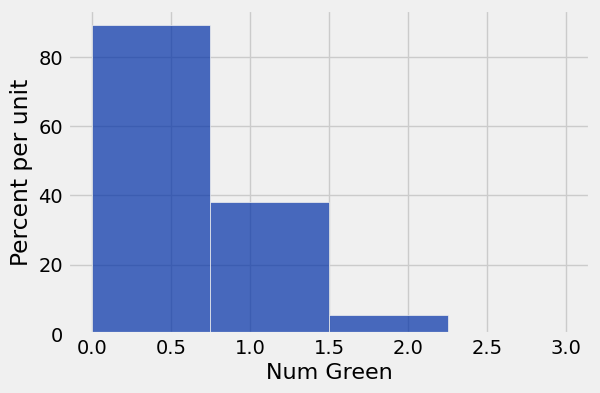

In [100]:
green_dist = make_array()

for i in np.arange(10000):
    result = num_green()
    green_dist = np.append(green_dist, result)

results_tbl = Table().with_column('Num Green', green_dist).hist(bins = 4)